313/313 [==============================] - 0s 943us/step
[7 2 1 0 4 1 4 9 0]


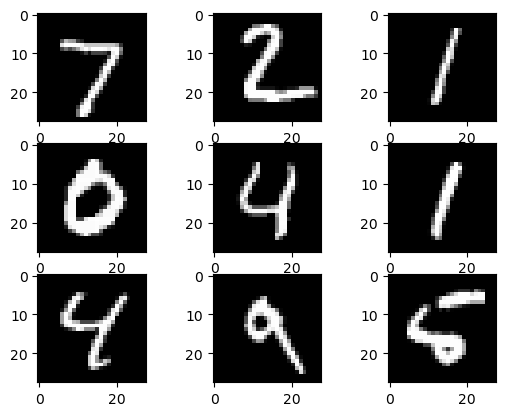

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers.legacy import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))

    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(80, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.1)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 

def evaluate_model(trainX, trainY, testX, testY):

    model = define_model()

    model.fit(trainX, trainY, epochs=1, batch_size=1000, validation_data=(testX, testY))

    return model
    


# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX_norm, testX_norm = prep_pixels(trainX, testX)
    # trainY, testY = prep_pixels(trainY, testY)

    # evaluate model
    model = evaluate_model(trainX_norm, trainY, testX_norm, testY)

    y_prob = model.predict(testX_norm)
    y_classes = y_prob.argmax(axis=-1)

    print(y_classes[0:9])

    testX = testX.reshape((testX.shape[0], 28, 28))
    
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()
 


# entry point, run the test harness
run_test_harness()

Epoch 1/100


2025-01-04 23:31:41.176707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-04 23:31:41.177200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-04 23:31:41.177706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 2s 7ms/step - loss: 0.2478
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0794
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0705
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0526
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0643
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0500
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0436
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0408
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0431
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0410
Epoch 11/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0371
Epoch 12/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0389
Epoch 13/100
8/8 [==============================] - 0s 8ms/step - loss: 0

2025-01-04 23:31:49.726047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-04 23:31:49.726718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-04 23:31:49.727250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 406ms/step


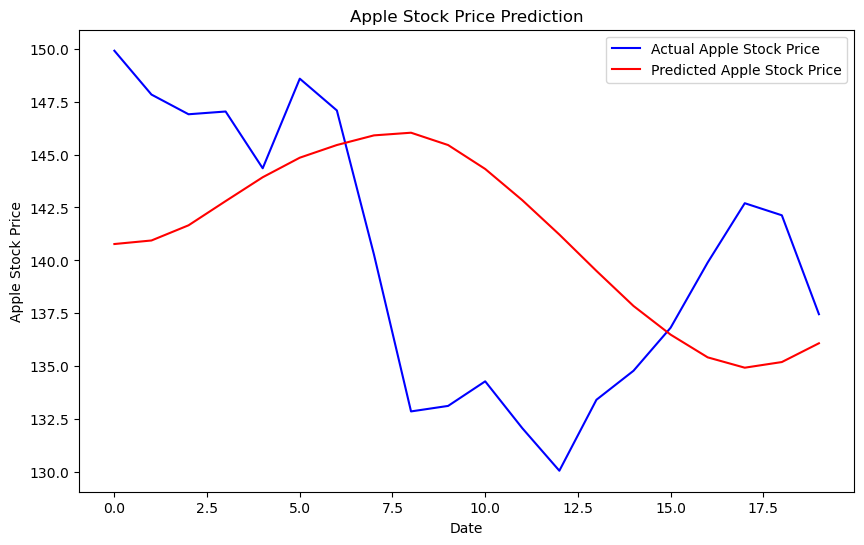

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


apple_training_complete = pd.read_csv('AAPL_train.csv')
apple_testing_complete = pd.read_csv('AAPL_test.csv')

apple_training_processed = apple_training_complete.iloc[:, 1:2].values
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)

features_set = []
labels = []
for i in range(10, 253):
    features_set.append(apple_training_scaled[i-10:i, 0])
    labels.append(apple_training_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = 32)


apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 10:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(10, 30):
    test_features.append(test_inputs[i-10:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()